# **Importando bibliotecas para tratamento de dados**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Importando e tratando o arquivo .csv**

In [ ]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("Table 3-1.csv") #Fazer importação do Github

# Tratamento dos dados

df_clean_lines = df.dropna(thresh=len(df.columns) - 2) # Remove linhas com mais de 2 valores NaN

df_clean = df_clean_lines.drop('Table 3-1:  CO2, CH4, and N2O Emissions from Energy (MMT CO2 Eq.)', axis=1) #Remove coluna vazia

df_clean.columns = df_clean.iloc[0]  # Define os nomes das colunas como sendo a primeira linha

df_clean = df_clean[1:].reset_index(drop=True)  # Remover a linha usada para os nomes e resetar o índice

df_clean.index = df_clean.iloc[:, 0] # Define os nomes das linhas como sendo a primeira coluna

df_clean = df_clean.iloc[:, 1:]  # Remove a primeira coluna

df_clean = df_clean.drop(index="Incineration of Waste", errors='ignore')

# Remover espaços extras e converter para float
df_clean = df_clean.apply(lambda x: x.str.replace(',', '').str.strip() if x.dtype == "object" else x)

df_clean = df_clean.apply(pd.to_numeric, errors='coerce')  # Converte para numérico


display(df_clean)

#print(df_clean.dtypes)  # Verifica os tipos das colunas

Saving Table 3-1.csv to Table 3-1 (2).csv


1,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Gas/Source,,,,,,,,,,,,,,,,,,,,,
CO2,4908.8,4867.4,4969.8,5086.1,5171.1,5227.1,5412.4,5484.8,5527.8,5603.3,...,5932.5,5847.3,5924.0,5740.5,5347.1,5520.0,5386.6,5179.7,5330.8,5377.9
Fossil Fuel Combustion,4740.7,4690.3,4793.2,4915.3,4990.0,5041.2,5232.8,5297.1,5333.7,5401.3,...,5747.1,5660.6,5751.2,5566.7,5193.5,5358.3,5227.7,5024.7,5157.6,5208.2
Electricity Generation,1820.8,1818.2,1831.5,1906.9,1931.2,1947.9,2021.0,2088.4,2177.4,2190.5,...,2400.9,2345.3,2411.9,2360.1,2145.7,2258.4,2157.7,2022.2,2038.1,2039.3
Transportation,1493.8,1447.6,1496.9,1532.4,1577.0,1609.9,1654.3,1670.1,1706.6,1761.1,...,1887.0,1882.6,1886.1,1791.8,1717.0,1728.3,1707.6,1696.8,1713.0,1737.6
Industrial,842.5,822.5,857.4,855.7,864.8,870.5,907.4,906.8,869.1,845.9,...,828.0,852.6,847.9,802.8,727.7,775.5,773.3,782.9,812.2,813.3
Residential,338.3,347.2,353.5,365.8,356.8,352.8,383.1,364.7,331.2,350.6,...,357.8,321.3,341.3,347.6,336.3,334.6,326.8,282.5,329.7,345.1
Commercial,217.4,223.3,220.6,220.1,222.4,225.6,234.5,233.6,215.9,218.8,...,223.5,208.6,218.8,223.6,223.5,220.1,220.7,196.7,221.0,231.9
U.S. Territories,27.9,31.6,33.3,34.4,37.8,34.5,32.6,33.4,33.4,34.5,...,49.9,50.2,45.1,40.8,43.5,41.4,41.5,43.6,43.5,41.0
Non-Energy Use of Fuels,118.1,127.6,125.9,116.4,125.5,128.3,123.8,132.3,149.7,156.3,...,138.9,140.1,125.2,125.3,106.2,114.1,108.5,105.6,121.7,114.3


# **Análise dos dados**

**Emissão de CO2 ao longo dos anos**

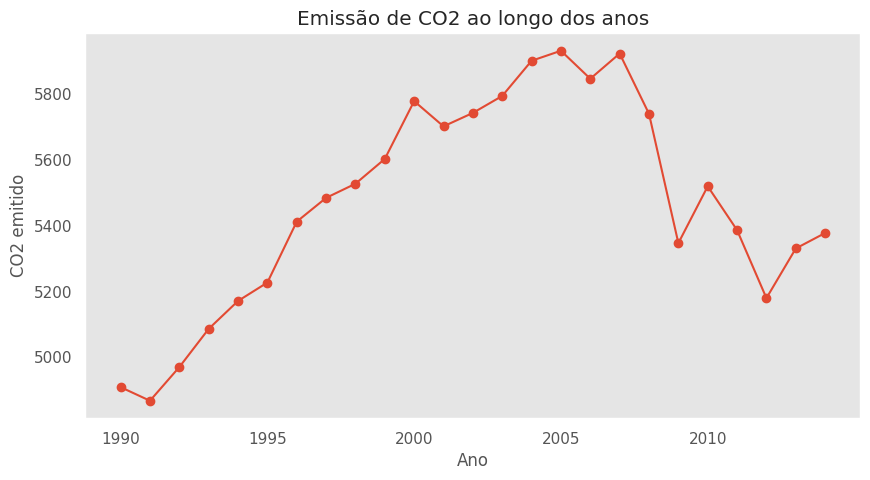

In [ ]:
df_clean.loc["CO2"].plot(figsize=(10,5), marker='o', title="Emissão de CO2 ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("CO2 emitido")
plt.grid()
plt.show()

COMEÇA AQUI

In [ ]:
# Dividir por índice de linhas
df_co2 = df_clean.iloc[1:14]  # Da linha 1 à 13
df_ch4 = df_clean.iloc[15:22]  # Da linha 15 à 21
df_n2o = df_clean.iloc[23:26]  # Da linha 23 à 25
df_co2

1,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Gas/Source,,,,,,,,,,,,,,,,,,,,,
Fossil Fuel Combustion,4740.7,4690.3,4793.2,4915.3,4990.0,5041.2,5232.8,5297.1,5333.7,5401.3,...,5747.1,5660.6,5751.2,5566.7,5193.5,5358.3,5227.7,5024.7,5157.6,5208.2
Electricity Generation,1820.8,1818.2,1831.5,1906.9,1931.2,1947.9,2021.0,2088.4,2177.4,2190.5,...,2400.9,2345.3,2411.9,2360.1,2145.7,2258.4,2157.7,2022.2,2038.1,2039.3
Transportation,1493.8,1447.6,1496.9,1532.4,1577.0,1609.9,1654.3,1670.1,1706.6,1761.1,...,1887.0,1882.6,1886.1,1791.8,1717.0,1728.3,1707.6,1696.8,1713.0,1737.6
Industrial,842.5,822.5,857.4,855.7,864.8,870.5,907.4,906.8,869.1,845.9,...,828.0,852.6,847.9,802.8,727.7,775.5,773.3,782.9,812.2,813.3
Residential,338.3,347.2,353.5,365.8,356.8,352.8,383.1,364.7,331.2,350.6,...,357.8,321.3,341.3,347.6,336.3,334.6,326.8,282.5,329.7,345.1
Commercial,217.4,223.3,220.6,220.1,222.4,225.6,234.5,233.6,215.9,218.8,...,223.5,208.6,218.8,223.6,223.5,220.1,220.7,196.7,221.0,231.9
U.S. Territories,27.9,31.6,33.3,34.4,37.8,34.5,32.6,33.4,33.4,34.5,...,49.9,50.2,45.1,40.8,43.5,41.4,41.5,43.6,43.5,41.0
Non-Energy Use of Fuels,118.1,127.6,125.9,116.4,125.5,128.3,123.8,132.3,149.7,156.3,...,138.9,140.1,125.2,125.3,106.2,114.1,108.5,105.6,121.7,114.3
Natural Gas Systems,37.7,38.0,37.7,41.0,41.1,42.6,40.1,39.7,29.7,30.8,...,30.1,30.2,31.0,32.8,32.3,32.4,35.7,35.2,38.5,42.4


In [ ]:
# Executar este código apenas uma vez
def adicionar_total(df):
    # Criar cópia
    df_copy = df.copy()

    # Adicionar coluna Total
    df_copy.loc[:, 'Total'] = df_copy.iloc[:, 1:].sum(axis=1)

    return df_copy

# Aplicar função
df_co2 = adicionar_total(df_co2)
df_ch4 = adicionar_total(df_ch4)
df_n2o = adicionar_total(df_n2o)

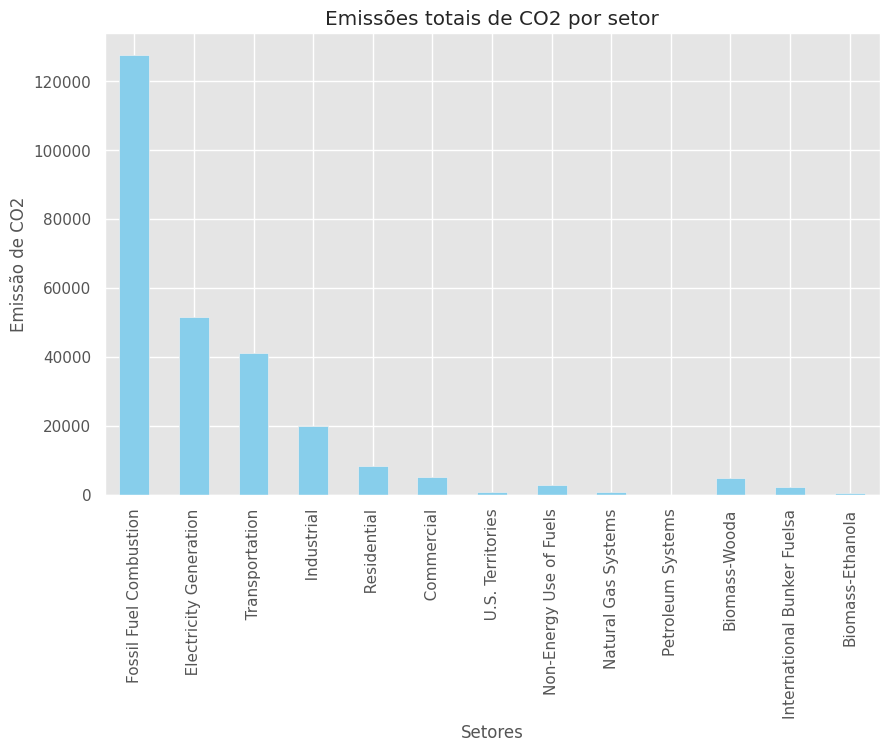

In [ ]:
# Gráfico de Emissão total de CO2 por setor
df_co2_total = df_co2["Total"]

df_co2_total.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Emissões totais de CO2 por setor")

# Ajustar os rótulos dos eixos
plt.xlabel("Setores")  # Ou outra variável no eixo X, como 'categorias', por exemplo
plt.ylabel("Emissão de CO2")

# Adicionar uma grade para o gráfico
plt.grid(True)

# Exibir o gráfico
plt.show()

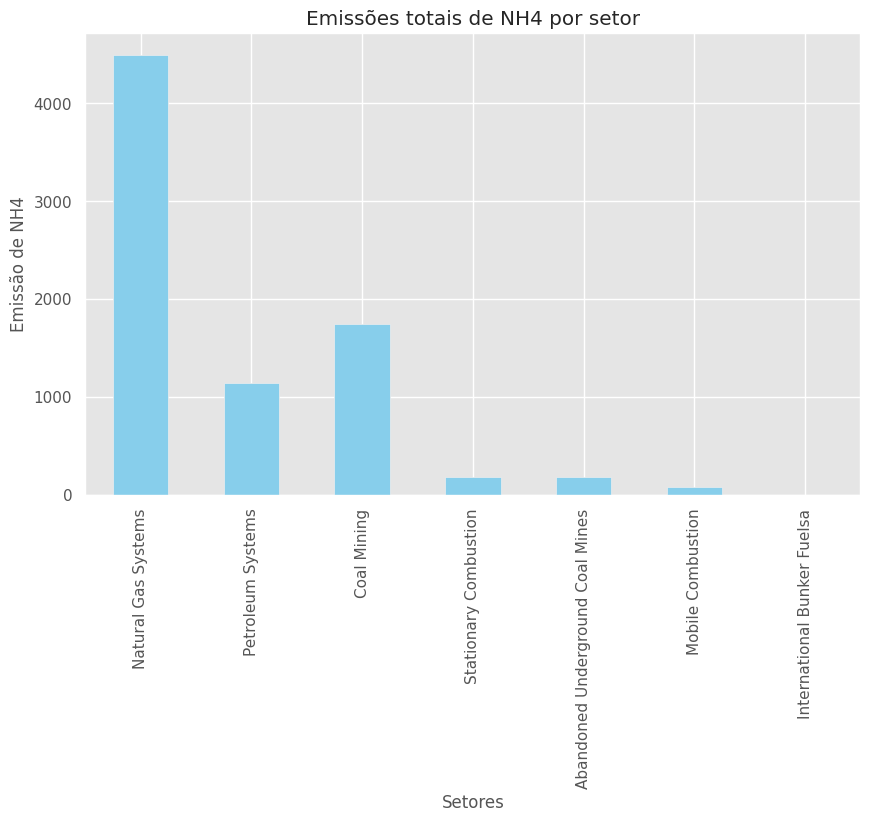

In [ ]:
# Gráfico de Emissão total de CH4 por setor
df_ch4_total = df_ch4["Total"]

df_ch4_total.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Emissões totais de CH4 por setor")

# Ajustar os rótulos dos eixos
plt.xlabel("Setores")  # Ou outra variável no eixo X, como 'categorias', por exemplo
plt.ylabel("Emissão de CH4")

# Adicionar uma grade para o gráfico
plt.grid(True)

# Exibir o gráfico
plt.show()

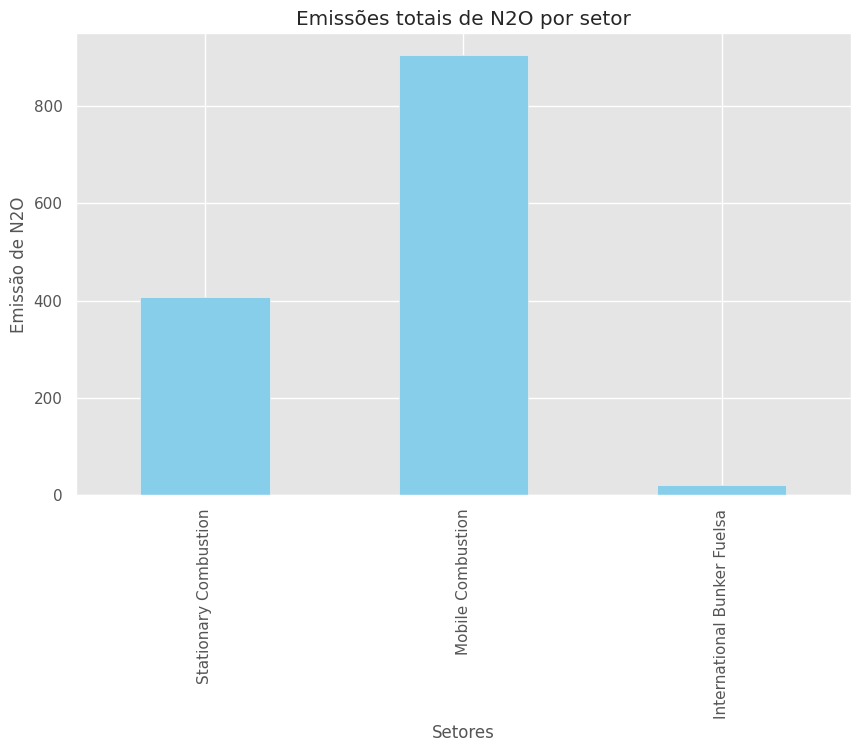

In [ ]:
# Gráfico de Emissão total de N2O por setor
df_n2o_total = df_n2o["Total"]

df_n2o_total.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Emissões totais de N2O por setor")

# Ajustar os rótulos dos eixos
plt.xlabel("Setores")  # Ou outra variável no eixo X, como 'categorias', por exemplo
plt.ylabel("Emissão de N2O")

# Adicionar uma grade para o gráfico
plt.grid(True)

# Exibir o gráfico
plt.show()

TERMINA AQUI

**Emissões totais - Sérgio**

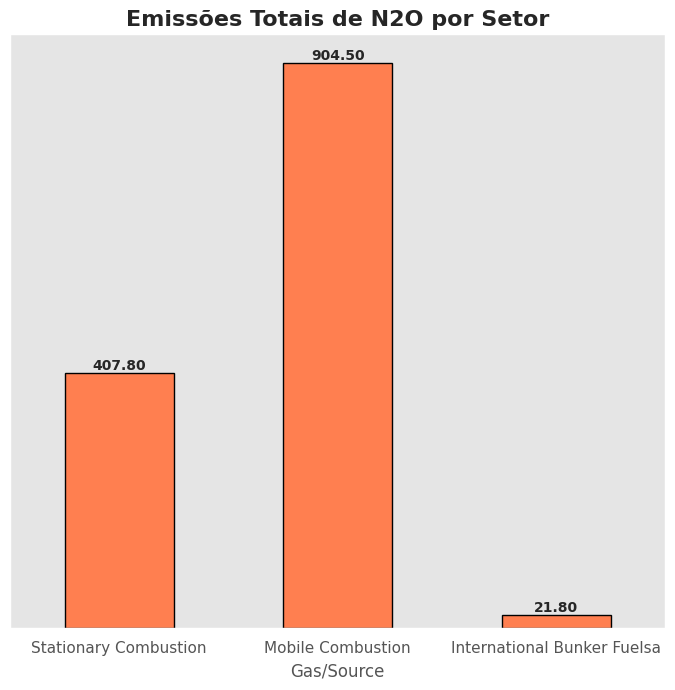

In [ ]:
# Gráfico de Emissão total de NH4 por setor
df_n2o_total = df_n2o["Total"]

# Criar figura
plt.figure(figsize=(12, 7))

# Plotar gráfico
df_n2o_total.plot(kind='bar',
                  figsize=(7,7),
                  color='coral',
                  edgecolor='black',  # Adicionar contorno
                  linewidth=1)

# Adicionar título com mais espaçamento
plt.title("Emissões Totais de N2O por Setor",
          fontsize=16,
          fontweight='bold',
          pad=1000)  # Aumentar espaçamento

# Alterando rótulos dos eixos
plt.xticks(rotation=0, ha='center')
plt.yticks([])

# Adicionar grade mais sutil
plt.grid(axis='x', linestyle='--', alpha=0)
plt.grid(axis='y', linestyle='--', alpha=0)

# Adicionar valores nas barras
for i, v in enumerate(df_n2o_total):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Ajustes finais
plt.title("Emissões Totais de N2O por Setor", fontsize=16, fontweight='bold')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
df_co2_total

,Total
Gas/Source,
Fossil Fuel Combustion,127599.8
Electricity Generation,51560.2
Transportation,41318.6
Industrial,20025.1
Residential,8368.0
Commercial,5353.5
U.S. Territories,974.5
Non-Energy Use of Fuels,3072.8
Natural Gas Systems,828.3


**Previsão e comparação de dados - Daniel**